<a href="https://colab.research.google.com/github/VicenteMercado/LabsIA/blob/main/Copia_de_Lab2_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:
- Benjamín Díaz
- Benjamín Fernández
- Vicente Mercado
- Thomas Molina

#Objetivo del Taller:

Se busca generar varios modelos de regresión lineal que permitan establecer relaciones entre una variable independiente y otra dependiente.

Para esto se utilizarán las 2 tablas (datasets) entregados con el problema.

El objetivo del modelo de regresión lineal será predecir la calidad de ambos tipos de vino.

In [ ]:
#@title Importar las librerías necesarias.
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib as matplt
import seaborn as sns
import matplotlib.pyplot as plt

#Análisis Exploratorio de los Datos (EDA):

Esta parte del taller se enfoca en encontrar los atributos que tienen una mayor correlación con un atributo determinado (en este caso, *quality*), en función de establecer variables independientes significativas para los modelos de regresión lineal.

A continuación, se mostrarán los pasos realizados para el Análisis Exploratorio de Datos:



##Conocer los Datos.

In [ ]:
#@title Leer los CSV.
wineRed = pd.read_csv("winequality-red.csv", sep=";")
wineWhite = pd.read_csv("winequality-white.csv", sep=";")

In [ ]:
#@title Mostrar la cabecera de la tabla de Vinos Tintos
wineRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#@title Mostrar la cabecera de la tabla de Vinos Blancos
wineWhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#@title Ver el tipo de dato para cada atributo
wineRed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wineWhite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Se entiende que no hay datos nulos, y que todos los datos son númericos, por lo que es posible continuar utilizando los datasets originales.

##Obtener los atributos con mayor correlación (Análisis de la Distribución):

Para averiguar que atributos funcionarían mejor para la predicción, en primer lugar se analizará, con la ayuda de un gráfico de pairplot, la distribución de los datos de calidad ('quality'), en función de cada atributo.

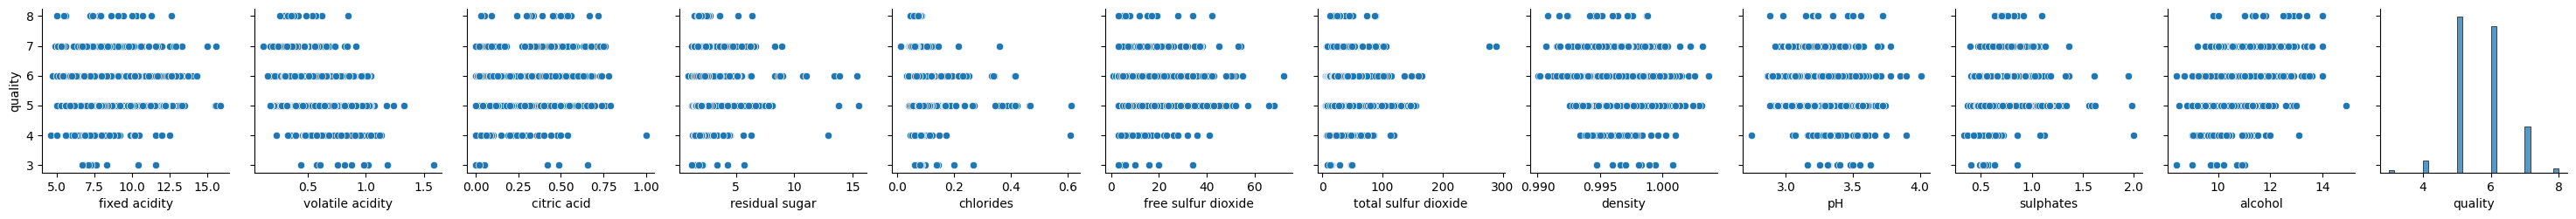

In [ ]:
#@title Gráfico de Vinos Tintos, pero sólo usando la fila de comparación con quality
sns.pairplot(wineRed,y_vars=["quality"])

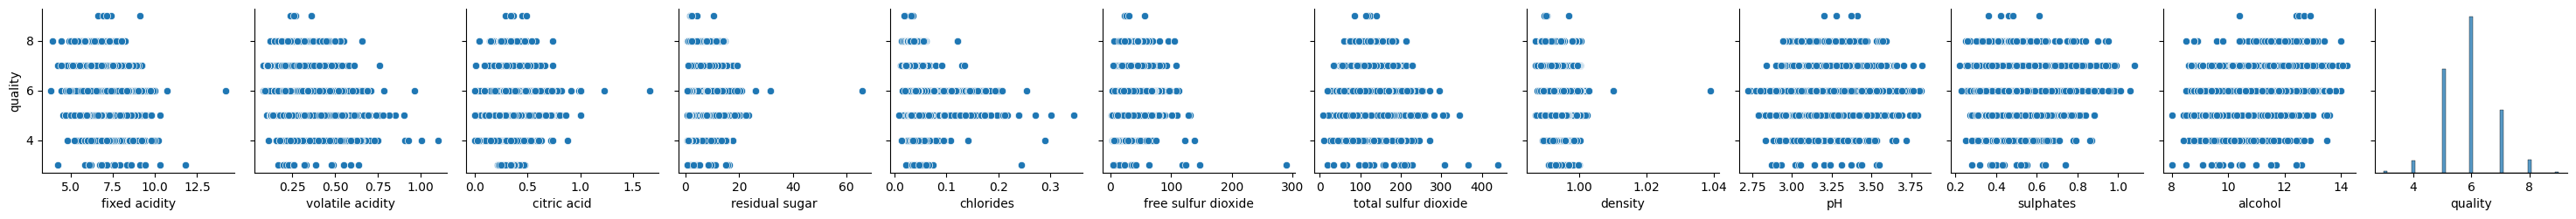

In [ ]:
#@title Gráfico de Vinos Blancos, pero sólo usando la fila de comparación con quality
sns.pairplot(wineWhite,y_vars=["quality"])

Es posible observar que ningún gráfico denota una distribución lo suficientemente lineal para poder generar un modelo de regresión adecuado. Por lo que este método de análisis no resultó eficaz.

---

A raíz de lo anterior, para encontrar los atributos que mayor correlación tienen con la variable a predecir, se generarán los siguientes gráficos de correlación con la infomación de cada set de datos:

<Axes: >

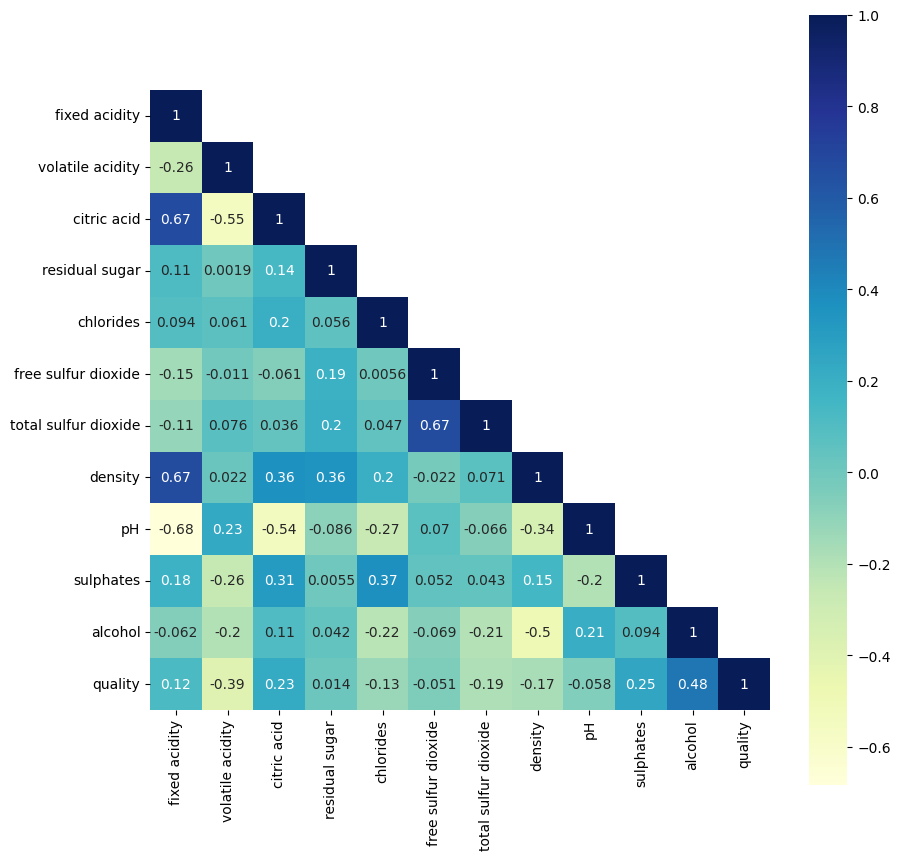

In [ ]:
#@title Mostrar gráfico de correlación de los Vinos Tintos
correlation= wineRed.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

Resultados:

En base a lo entregado por la gráfica de correlación se puede apreciar que los valores más cercanos a 1 y que nos permitiran evaluar los posibles candidatos para una regresión lineal son 'alcohol' con 0.48, 'sulphates' en 0.25 y 'citric acid' 0.23. Con estos tres atributos de valores altos se podria llegar a realizar una regresión lineal.  

<Axes: >

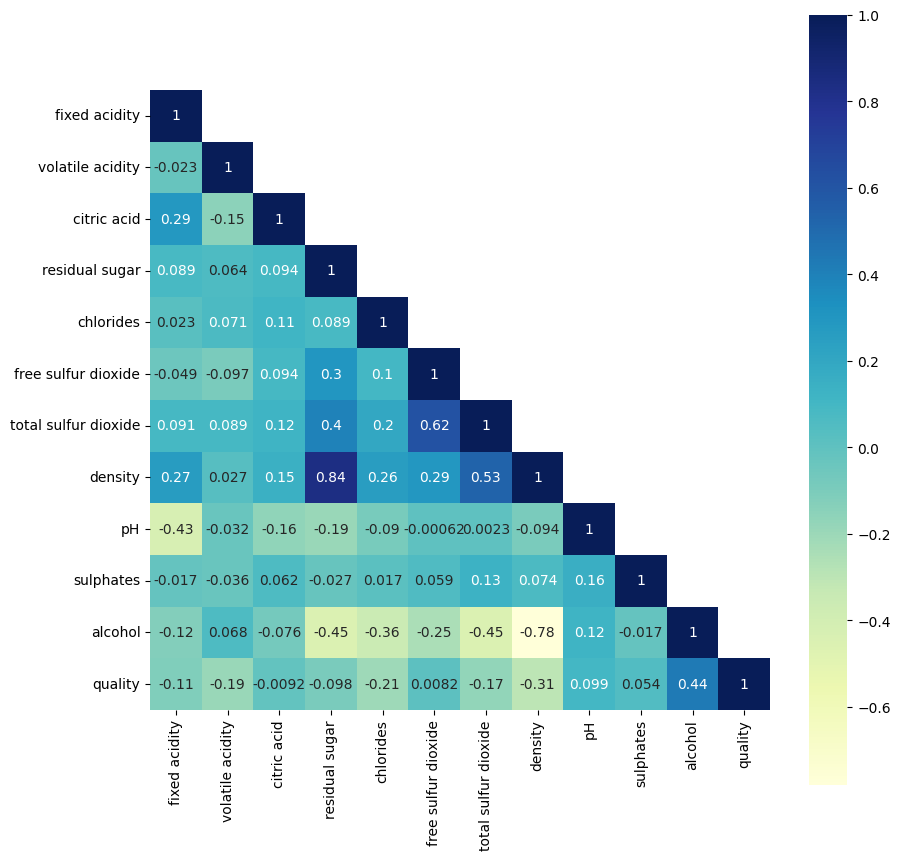

In [ ]:
#@title Mostrar gráfico de correlación de los Vinos Blancos
correlation = wineWhite.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

Resultados:

De la gráfica se puede extraer que para los vinos blancos los atributos que tienen mayor correlación entre sus datos son 'alcohol' con 0.44, 'pH' en 0.099 y 'sulphates' con 0.054. Sin embargo, estos dos últimos atributos muestran valores muy alejados a 1, por ende la correlación es más débil.

---

A raíz de lo anterior, se crearán nuevas tablas para cada set de datos que desprecien todos los atributos que no sean los más correlacionados con la variable 'quality'. 

In [ ]:
#@title Crear nueva tabla para los Vinos Tintos.
dfRedWine = pd.DataFrame(wineRed, columns=["citric acid", "sulphates", "alcohol", "quality"])
dfRedWine.head()

,citric acid,sulphates,alcohol,quality
0,0.00,0.56,9.4,5
1,0.00,0.68,9.8,5
2,0.04,0.65,9.8,5
3,0.56,0.58,9.8,6
4,0.00,0.56,9.4,5


In [ ]:
#@title Crear nueva tabla para los Vinos Blancos.
dfWhiteWine = pd.DataFrame(wineWhite, columns=["pH", "sulphates", "alcohol", "quality"])
dfWhiteWine.head()

,pH,sulphates,alcohol,quality
0,3.00,0.45,8.8,6
1,3.30,0.49,9.5,6
2,3.26,0.44,10.1,6
3,3.19,0.40,9.9,6
4,3.19,0.40,9.9,6


##Mejorar los Datos:

En el siguiente apartado se hará un análisis de los atributos escogidos antes de realizar la regresión lineal, esto es para ver si se necesita extraer outliers en la data que afecten a la distribución de esta, por ello se verá cada dataframe por separado y se tomará una decisión en consecuencia.

In [ ]:
#@title Observar los datos estadísticos.
dfRedWine.describe()

,citric acid,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.270976,0.658149,10.422983,5.636023
std,0.194801,0.169507,1.065668,0.807569
min,0.000000,0.330000,8.400000,3.000000
25%,0.090000,0.550000,9.500000,5.000000
50%,0.260000,0.620000,10.200000,6.000000
75%,0.420000,0.730000,11.100000,6.000000
max,1.000000,2.000000,14.900000,8.000000


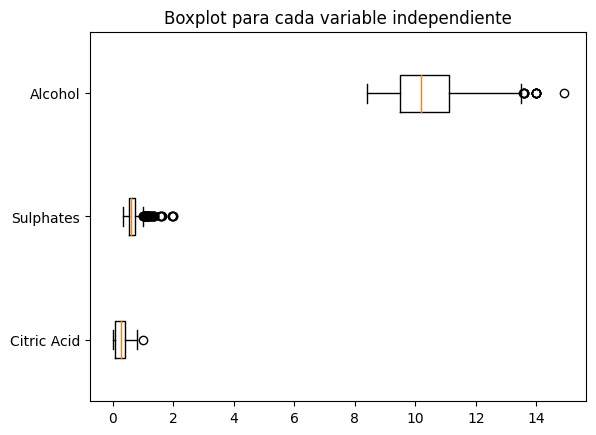

In [ ]:
#@title Observar la distribución de cada atributo en un gráfico de boxplot.
plt.boxplot([dfRedWine["citric acid"], dfRedWine["sulphates"], dfRedWine["alcohol"]], vert=False, labels=["Citric Acid", "Sulphates", "Alcohol"])
plt.title("Boxplot para cada variable independiente")
plt.show()

Como se logra observar en el bloxplot de vino tinto hay outliers que demuestran afectar la distribución negativamente mostrando que los datos están muy cercanos unos a otros, como en el caso del atributo "sulphates", por lo cual, se ha decidido extraer algunos de estos datos, para así tener un mejor reparto de estos.

In [ ]:
#@title Se remueven manualmente algunos outliers utilizando condiciones.
condCitric=dfRedWine["citric acid"]<=0.8
condSul=dfRedWine["sulphates"]<=0.94
condAlc=dfRedWine["alcohol"]<=13.4

modWineRed = dfRedWine[condCitric&condSul&condAlc]
modWineRed.describe()

,citric acid,sulphates,alcohol,quality
count,1510.000000,1510.000000,1510.000000,1510.000000
mean,0.263801,0.631603,10.410320,5.627815
std,0.191660,0.116035,1.020506,0.802098
min,0.000000,0.330000,8.400000,3.000000
25%,0.090000,0.550000,9.500000,5.000000
50%,0.250000,0.610000,10.200000,6.000000
75%,0.420000,0.710000,11.100000,6.000000
max,0.790000,0.940000,13.400000,8.000000


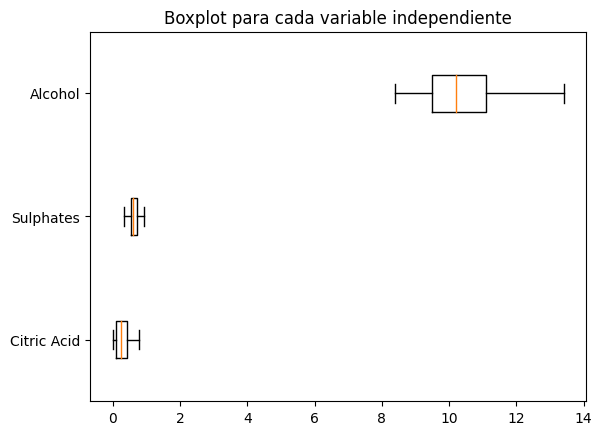

In [ ]:
#@title Graficar la nueva distribución de datos.
plt.boxplot([modWineRed["citric acid"], modWineRed["sulphates"], modWineRed["alcohol"]], vert=False, labels=["Citric Acid", "Sulphates", "Alcohol"])
plt.title("Boxplot para cada variable independiente")
plt.show()

Al haber realizado un acotamiento en el rango de los datos se aprecian dos cosas, la primera es la no perdida de demasiada data en total y la segunda observación es que se eliminaron los outliers existentes, por ellos ahora tenemos un bloxplot más 'limpio'.

---

Se repite el procedimiento anterior con la tabla de vinos blancos.

In [ ]:
#@title Observar los datos estadísticos.
dfWhiteWine.describe()

,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000
mean,3.188267,0.489847,10.514267,5.877909
std,0.151001,0.114126,1.230621,0.885639
min,2.720000,0.220000,8.000000,3.000000
25%,3.090000,0.410000,9.500000,5.000000
50%,3.180000,0.470000,10.400000,6.000000
75%,3.280000,0.550000,11.400000,6.000000
max,3.820000,1.080000,14.200000,9.000000


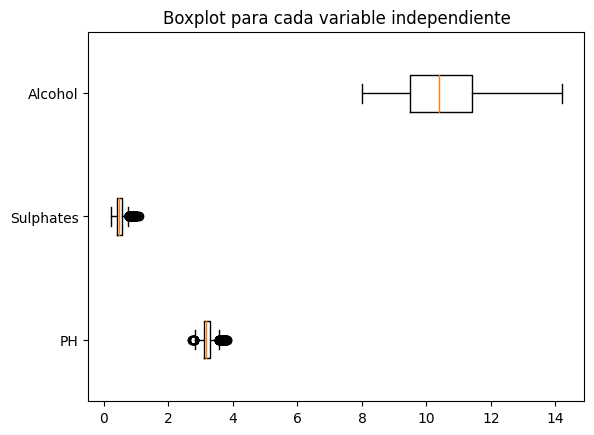

In [ ]:
#@title Observar la distribución de cada atributo en un gráfico de boxplot.
plt.boxplot([dfWhiteWine["pH"], dfWhiteWine["sulphates"], dfWhiteWine["alcohol"]], vert=False, labels=["PH", "Sulphates", "Alcohol"])
plt.title("Boxplot para cada variable independiente")
plt.show()

In [ ]:
#@title Se remueven manualmente algunos outliers utilizando condiciones.
condPH=dfWhiteWine["pH"]<=3.55
condPH2=dfWhiteWine["pH"]>=2.80
condSul=dfWhiteWine["sulphates"]<=0.75

modWineWhite = dfWhiteWine[condPH&condSul&condPH2]
modWineWhite.describe()

,pH,sulphates,alcohol,quality
count,4680.000000,4680.000000,4680.00000,4680.000000
mean,3.180201,0.478701,10.50210,5.869017
std,0.139577,0.097835,1.22477,0.882824
min,2.800000,0.220000,8.00000,3.000000
25%,3.080000,0.400000,9.40000,5.000000
50%,3.170000,0.470000,10.40000,6.000000
75%,3.270000,0.540000,11.40000,6.000000
max,3.550000,0.750000,14.20000,9.000000


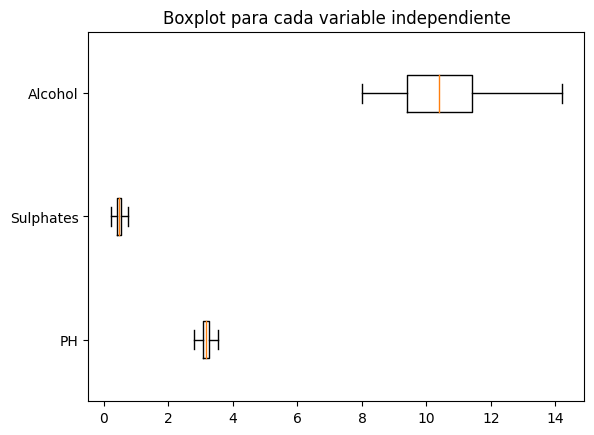

In [ ]:
#@title Graficar la nueva distribución de datos.
plt.boxplot([modWineWhite["pH"], modWineWhite["sulphates"], modWineWhite["alcohol"]], vert=False, labels=["PH", "Sulphates", "Alcohol"])
plt.title("Boxplot para cada variable independiente")
plt.show()

En conclusión, para el vino blanco se logro hacer un acotamiento de los datos sin una perdida contundente en la data y también se logró la eliminación de los outliers que afectaban a los atributos, por ello ahora la data está preparada para realizar la regresión lineal.

In [ ]:
#@title Reemplazar los dataframes en variables más cortas y representativas:
RedWine = modWineRed
WhiteWine = modWineWhite

#Regresión Lineal:

En el siguiente apartado, se busca crear los modelos de regresión lineal utilizando la gradiente descendiente por lotes y la gradiente descendiente estócastica.

Además se analizarán y compararan los modelos resultantes, a modo de obtener conclusiones acerca de los gráficos y el tipo de gradiente utilizada para la generación del modelo.

A continuación, se muestran los pasos para conseguir la regresión lineal:

##Separar Datos de Entrenamiento y de Testing:

Para generar una buena predicción, se crearán tuplas con los datos a utilizar en la predicción de la regresión lineal. Para luego, poder separar estas tuplas en datos de entrenamiento ('train_set') y datos de testing ('test_set').

Se utilizarán algunos modulos de la libreía sklearn para simplificar el trabajo.

In [ ]:
#Importar librerías.
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

#@title Definir función para la regresión.
def regresionSGD(x, y):
  return SGDRegressor().fit(x, y)

In [ ]:
#@title Separar en TraIning y Testing (Vinos Tintos).
redTraining, redTest = train_test_split(RedWine, test_size=0.2)

In [ ]:
#@title Mostrar largo del conjunto de entrenamiento (Vinos Tintos).
len(redTraining)

1208

In [ ]:
#@title Mostrar largo del conjunto de testeo (Vinos Tintos).
len(redTest)

302

In [ ]:
#@title Separar en TraIning y Testing (Vinos Blancos).
whiteTraining, whiteTest = train_test_split(WhiteWine, test_size=0.2)

In [ ]:
#@title Mostrar largo del conjunto de entrenamiento (Vinos Blancos).
len(whiteTraining)

3744

In [ ]:
#@title Mostrar largo del conjunto de testeo (Vinos Blancos).
len(whiteTest)

936

## Regresión Lineal con Gradiente Estocástica:


A continuación se detalla el procedimiento para conseguir un modelo de regresión lineal utilizando gradiente estocástica.

In [ ]:
#@title Definir los Modelos.
SGD_Alcohol_Red = regresionSGD(redTraining[["alcohol"]], redTraining[["quality"]])
SGD_Sulphates_Red = regresionSGD(redTraining[["sulphates"]], redTraining[["quality"]])
SGD_CitricAcid_Red = regresionSGD(redTraining[["citric acid"]], redTraining[["quality"]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###SGD de los Vinos Tintos y sus atributos.

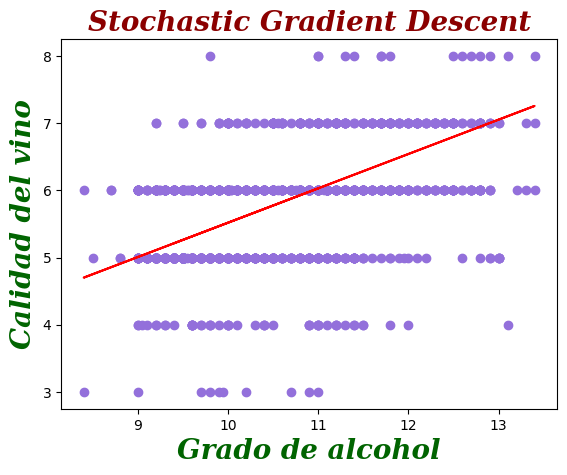

In [ ]:
#@title SGD Alcohol - Calidad:
plt.plot(RedWine.alcohol, RedWine.quality, 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Stochastic Gradient Descent",color = 'darkred', fontdict = font1)
plt.xlabel('Grado de alcohol',fontdict = font1)
plt.ylabel('Calidad del vino',fontdict = font1)
plt.plot(RedWine.alcohol, SGD_Alcohol_Red.coef_[0]*RedWine.alcohol+SGD_Alcohol_Red.intercept_, color = 'red')

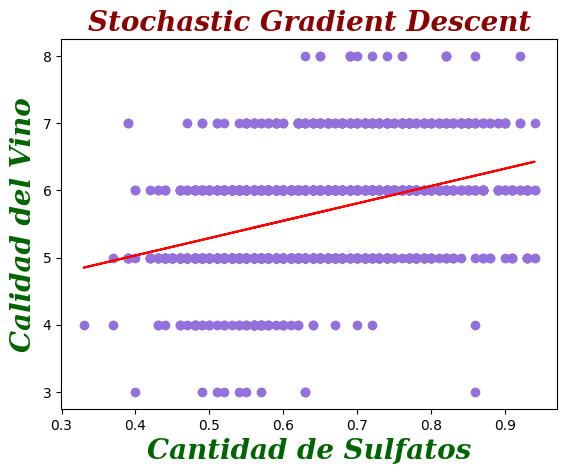

In [ ]:
#@title SGD Sulfatos - Calidad:
plt.plot(RedWine.sulphates, RedWine.quality, 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Stochastic Gradient Descent",color = 'darkred', fontdict = font1)
plt.xlabel('Cantidad de Sulfatos',fontdict = font1)
plt.ylabel('Calidad del Vino',fontdict = font1)
plt.plot(RedWine.sulphates, SGD_Sulphates_Red.coef_[0]*RedWine.sulphates+SGD_Sulphates_Red.intercept_, color = 'red')

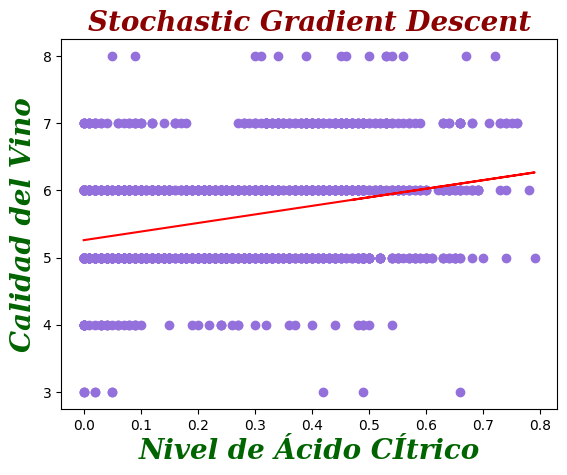

In [ ]:
#@title SGD Ácido CÍtrico - Calidad:
plt.plot(RedWine['citric acid'], RedWine.quality, 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Stochastic Gradient Descent",color = 'darkred', fontdict = font1)
plt.xlabel('Nivel de Ácido CÍtrico',fontdict = font1)
plt.ylabel('Calidad del Vino',fontdict = font1)
plt.plot(RedWine['citric acid'], SGD_CitricAcid_Red.coef_[0]*RedWine['citric acid']+SGD_CitricAcid_Red.intercept_, color = 'red')

###SGD de los Vinos Blancos y sus atributos.

In [ ]:
#Definir los Modelos.
SGD_Alcohol_White = regresionSGD(whiteTraining[["alcohol"]], whiteTraining[["quality"]])
SGD_Sulphates_White = regresionSGD(whiteTraining[["sulphates"]], whiteTraining[["quality"]])
SGD_PH_White = regresionSGD(whiteTraining[["pH"]], whiteTraining[["quality"]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


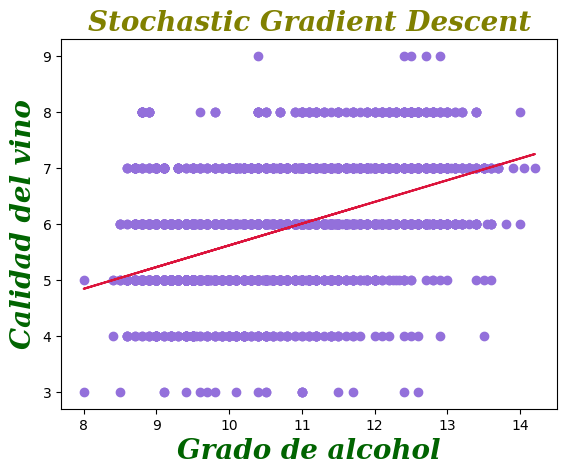

In [ ]:
#@title SGD Alcohol - Calidad:
plt.plot(WhiteWine.alcohol, WhiteWine.quality, 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Stochastic Gradient Descent",color = 'olive', fontdict = font1)
plt.xlabel('Grado de alcohol',fontdict = font1)
plt.ylabel('Calidad del vino',fontdict = font1)
plt.plot(WhiteWine.alcohol, SGD_Alcohol_White.coef_[0]*WhiteWine.alcohol+SGD_Alcohol_White.intercept_, color = 'crimson')

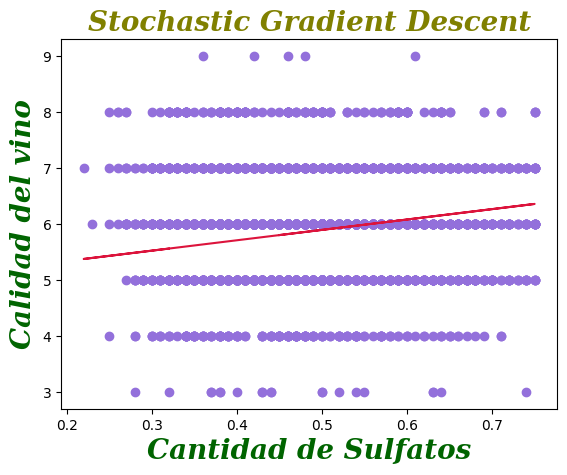

In [ ]:
#@title SGD Sulfatos - Calidad:
plt.plot(WhiteWine.sulphates, WhiteWine.quality, 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Stochastic Gradient Descent",color = 'olive', fontdict = font1)
plt.xlabel('Cantidad de Sulfatos',fontdict = font1)
plt.ylabel('Calidad del vino',fontdict = font1)
plt.plot(WhiteWine.sulphates, SGD_Sulphates_White.coef_[0]*WhiteWine.sulphates+SGD_Sulphates_White.intercept_, color = 'crimson')

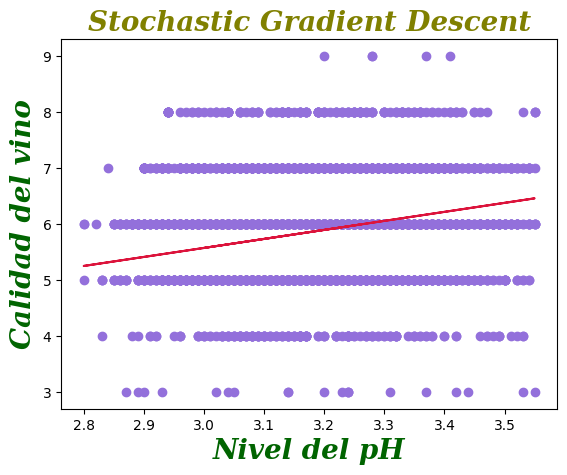

In [ ]:
#@title SGD pH - Calidad:
plt.plot(WhiteWine.pH, WhiteWine.quality, 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Stochastic Gradient Descent",color = 'olive', fontdict = font1)
plt.xlabel('Nivel del pH',fontdict = font1)
plt.ylabel('Calidad del vino',fontdict = font1)
plt.plot(WhiteWine.pH, SGD_PH_White.coef_[0]*WhiteWine.pH+SGD_PH_White.intercept_, color = 'crimson')

##Regresión Lineal con Gradiente Batch:

In [ ]:
#@title Función principal para la regresión con Batch:
def regresionBGD(x, y, iteraciones, pasoGradiente):
    #Obtener el número de datos etiqueta.
    m = len(y)
    #Generar una fila de ceros.
    datos = np.zeros(x.shape[1])
    #Iterar para modificar los datos (pendiente e intercepto).
    for i in range(iteraciones):
        #Obtener la predicción de un dato a través de una multiplicación matricial.
        y_y = np.dot(x, datos)
        #Actualizar los datos de la pendiente e intercepto.
        datos = datos - pasoGradiente * (1.0/m) * np.dot(x.T, y_y-y)
    return datos, y_y
  
# x = Arreglo de datos en la Variable Independiente.
# y = Arreglo de datos en Variable Dependiente.
# iteraciones = La cantidad de veces que la función actualizará los valores de 
#               la pendiente y el intercepto.
# pasoGradiente = El nivel de ajuste que utilizará en cada iteración.

###BGD de los Vinos Tintos y sus atributos.

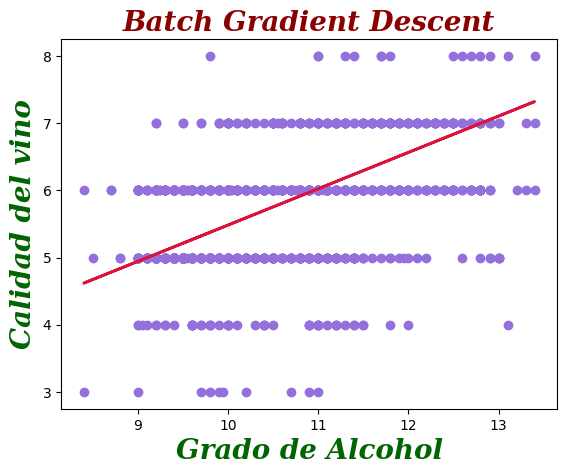

In [ ]:
#@title BGD Alcohol - Calidad:

#Seleccionar los atributos.
varX = redTest['alcohol'].values
varY = redTest['quality'].values

#Modificar el formato de la variable X.
varX = np.reshape(varX, (-1,1)) #Convertir fila a columna.
varX = np.hstack((np.ones((varX.shape[0], 1)), varX)) #Agregar una columna de unos.

#Datos de la fórmula.
pasoGradiente = 0.001
iteraciones = 2000

#Obtener los datos para la regresión.
res1, yP1 =regresionBGD(varX,varY,iteraciones,pasoGradiente)

#Graficar.
plt.plot(RedWine['alcohol'], RedWine['quality'], 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Batch Gradient Descent",color = 'darkred', fontdict = font1)
plt.xlabel('Grado de Alcohol',fontdict = font1)
plt.ylabel('Calidad del vino',fontdict = font1)
plt.plot(varX[:,1], np.dot(varX, res1), color='crimson', linewidth=2, label='Regresión Lineal')

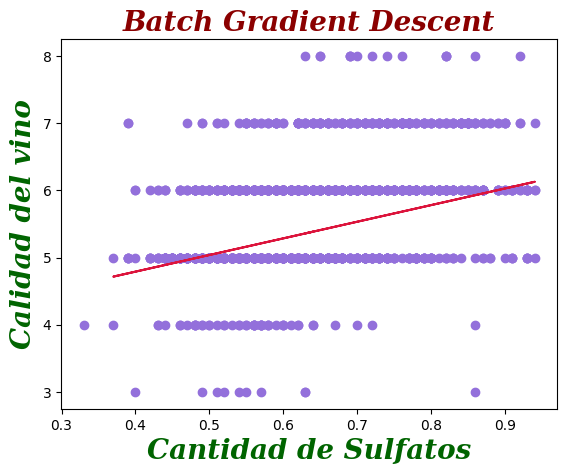

In [ ]:
#@title BGD Sulfatos - Calidad:

#Seleccionar los atributos.
varX = redTest['sulphates'].values
varY = redTest['quality'].values

#Modificar el formato de la variable X.
varX = np.reshape(varX, (-1,1)) #Convertir fila a columna.
varX = np.hstack((np.ones((varX.shape[0], 1)), varX)) #Agregar una columna de unos.

#Datos de la fórmula.
pasoGradiente = 0.001
iteraciones = 2000

#Obtener los datos para la regresión.
res2, yP2 =regresionBGD(varX,varY,iteraciones,pasoGradiente)

#Graficar.
plt.plot(RedWine['sulphates'], RedWine['quality'], 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Batch Gradient Descent",color = 'darkred', fontdict = font1)
plt.xlabel('Cantidad de Sulfatos',fontdict = font1)
plt.ylabel('Calidad del vino',fontdict = font1)
plt.plot(varX[:,1], np.dot(varX, res2), color='crimson')

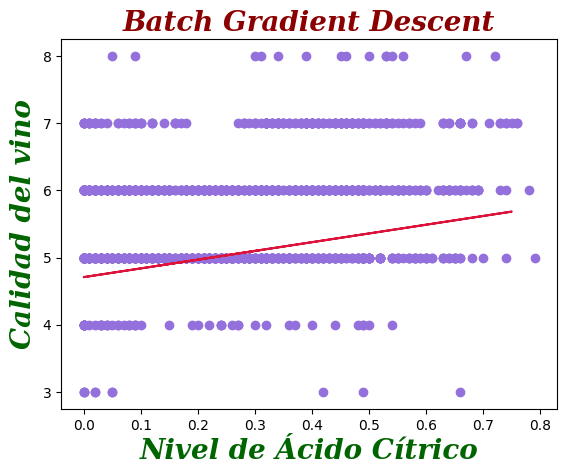

In [ ]:
#@title BGD Ácido Cítrico - Calidad:

#Seleccionar los atributos.
varX = redTest['citric acid'].values
varY = redTest['quality'].values

#Modificar el formato de la variable X.
varX = np.reshape(varX, (-1,1)) #Convertir fila a columna.
varX = np.hstack((np.ones((varX.shape[0], 1)), varX)) #Agregar una columna de unos.

#Datos de la fórmula.
pasoGradiente = 0.001
iteraciones = 2000

#Obtener los datos para la regresión.
res3, yP3 =regresionBGD(varX,varY,iteraciones,pasoGradiente)

#Graficar.
plt.plot(RedWine['citric acid'], RedWine['quality'], 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Batch Gradient Descent",color = 'darkred', fontdict = font1)
plt.xlabel('Nivel de Ácido Cítrico',fontdict = font1)
plt.ylabel('Calidad del vino',fontdict = font1)
plt.plot(varX[:,1], np.dot(varX, res3), color='crimson')

###BGD de los Vinos Blancos y sus atributos.

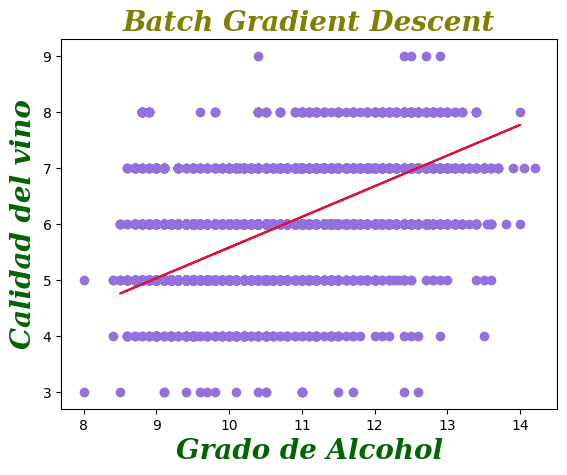

In [ ]:
#@title BGD Alcohol - Calidad:

#Seleccionar los atributos.
varX = whiteTest['alcohol'].values
varY = whiteTest['quality'].values

#Modificar el formato de la variable X.
varX = np.reshape(varX, (-1,1)) #Convertir fila a columna.
varX = np.hstack((np.ones((varX.shape[0], 1)), varX)) #Agregar una columna de unos.

#Datos de la fórmula.
pasoGradiente = 0.001
iteraciones = 2000

#Obtener los datos para la regresión.
res4, yP4 =regresionBGD(varX,varY,iteraciones,pasoGradiente)

#Graficar.
plt.plot(WhiteWine['alcohol'], WhiteWine['quality'], 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Batch Gradient Descent",color = 'olive', fontdict = font1)
plt.xlabel('Grado de Alcohol',fontdict = font1)
plt.ylabel('Calidad del vino',fontdict = font1)
plt.plot(varX[:,1], np.dot(varX, res4), color='crimson')

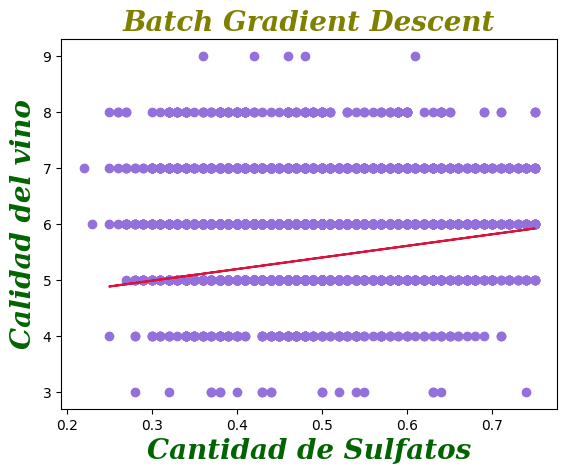

In [ ]:
#@title BGD Sulfatos - Calidad:

#Seleccionar los atributos.
varX = whiteTest['sulphates'].values
varY = whiteTest['quality'].values

#Modificar el formato de la variable X.
varX = np.reshape(varX, (-1,1)) #Convertir fila a columna.
varX = np.hstack((np.ones((varX.shape[0], 1)), varX)) #Agregar una columna de unos.

#Datos de la fórmula.
pasoGradiente = 0.001
iteraciones = 2000

#Obtener los datos para la regresión.
res5, yP5 =regresionBGD(varX,varY,iteraciones,pasoGradiente)

#Graficar.
plt.plot(WhiteWine['sulphates'], WhiteWine['quality'], 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Batch Gradient Descent",color = 'olive', fontdict = font1)
plt.xlabel('Cantidad de Sulfatos',fontdict = font1)
plt.ylabel('Calidad del vino',fontdict = font1)
plt.plot(varX[:,1], np.dot(varX, res5), color='crimson')

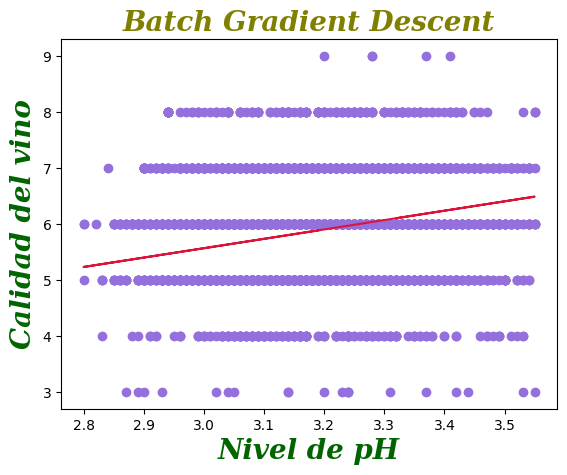

In [ ]:
#@title BGD pH - Calidad:

#Seleccionar los atributos.
varX = whiteTest['pH'].values
varY = whiteTest['quality'].values

#Modificar el formato de la variable X.
varX = np.reshape(varX, (-1,1)) #Convertir fila a columna.
varX = np.hstack((np.ones((varX.shape[0], 1)), varX)) #Agregar una columna de unos.

#Datos de la fórmula.
pasoGradiente = 0.001
iteraciones = 2000

#Obtener los datos para la regresión.
res6, yP6 =regresionBGD(varX,varY,iteraciones,pasoGradiente)

#Graficar.
plt.plot(WhiteWine['pH'], WhiteWine['quality'], 'o', color = 'mediumpurple')
font1 = {'family': 'serif','color':'darkgreen','size':20,'style':'oblique','weight':'bold'}
plt.title("Batch Gradient Descent",color = 'olive', fontdict = font1)
plt.xlabel('Nivel de pH',fontdict = font1)
plt.ylabel('Calidad del vino',fontdict = font1)
plt.plot(varX[:,1], np.dot(varX, res6), color='crimson')

##Definir funciones para el cálculo de errores (Métricas):

Para poder concluir si el modelo de regresión es representativo, se establecen las siguientes funciones para calcular el R2 y el R2 Ajustado.

Las funciones están basadas en el siguiente análisis de la ecuación del coeficiente de determinación:

- $R^2 = 1 - SSR/TSS$

- $SSR = \displaystyle\sum_{i} $($y$<sub>$i$</sub>$-f$<sub>$i$</sub>)$^2$

- $TSS = \displaystyle\sum_{i} $($y$<sub>$i$</sub>$-y$<sub>$prom$</sub>)$^2$

- $R^2 = TSS/TSS - SSR/TSS = (TSS-SSR)/TSS$

Se obtiene el valor $ESS$:

- $TSS - SSR = ESS$

- $ESS = \displaystyle\sum_{i} $($f$<sub>$i$</sub>$-y$<sub>$prom$</sub>)$^2$

Se concluye que:

- $R^2 = ESS/TSS$

In [ ]:
#@title Función para calcular el R2.
def R2(y,yi,prom_y):
  sumSquaresResiduals = 0
  totalSumSquares = 0
  explainedSumSquares = 0
  for i in range (0,len(y)):
    sumSquaresResiduals += (y[i]-yi[i])**2 #SSR
    totalSumSquares += (y[i]-prom_y)**2 #TSS
    explainedSumSquares += (yi[i]-prom_y)**2 #ESS
  R_square = (explainedSumSquares/totalSumSquares)

  return R_square

In [ ]:
#@title Función para calcular el R2 Ajustado.
def Adjusted_R2(n,k, R_square):
  adj = 1 - ((n-1)/(n-k-1))*(1-R_square)
  return adj

##Comparar métricas de cada modelo.

In [ ]:
#@title Alcohol - Calidad (Vinos Tintos):

#Definir datos (Stochasthic)
y_Stochastic = redTest['quality'].values #Real
yi_Stochastic = SGD_Alcohol_Red.predict(redTest[['alcohol']]) #Predicción
prom_Stochastic = np.mean(y_Stochastic) #Promedio Real

#Definir datos (Batch)
y_Batch = redTest['quality'].values #Real
yi_Batch = yP1
prom_Batch = np.mean(y_Batch) #Promedio Real

#Cálculo de R2.
r2_Stochastic = R2(y_Stochastic, yi_Stochastic, prom_Stochastic)
r2_Batch = R2(y_Batch, yi_Batch, prom_Batch)
print("R2 para la gradiente Estocástica:", r2_Stochastic)
print("R2 para la gradiente Batch:", r2_Batch)

print("")

#Cálculo de R2 Ajustado.
adr2_Stochastic = Adjusted_R2(len(y_Stochastic), 1, r2_Stochastic)
adr2_Batch = Adjusted_R2(len(y_Batch), 1, r2_Batch)
print("R2 Ajustado para la gradiente Estocástica:", adr2_Stochastic)
print("R2 Ajustado para la gradiente Batch:", adr2_Batch)

R2 para la gradiente Estocástica: 0.40579837991718687
R2 para la gradiente Batch: 0.45394385474698906

R2 Ajustado para la gradiente Estocástica: 0.4038177078502442
R2 Ajustado para la gradiente Batch: 0.45212366759614564


In [ ]:
#@title Sulfatos - Calidad (Vinos Tintos):

#Definir datos (Stochasthic)
y_Stochastic = redTest['quality'].values #Real
yi_Stochastic = SGD_Sulphates_Red.predict(redTest[['sulphates']]) #Predicción
prom_Stochastic = np.mean(y_Stochastic) #Promedio Real

#Definir datos (Batch)
y_Batch = redTest['quality'].values #Real
yi_Batch = yP2
prom_Batch = np.mean(y_Batch) #Promedio Real

#Cálculo de R2.
r2_Stochastic = R2(y_Stochastic, yi_Stochastic, prom_Stochastic)
r2_Batch = R2(y_Batch, yi_Batch, prom_Batch)
print("R2 para la gradiente Estocástica:", r2_Stochastic)
print("R2 para la gradiente Batch:", r2_Batch)

print("")

#Cálculo de R2 Ajustado.
adr2_Stochastic = Adjusted_R2(len(y_Stochastic), 1, r2_Stochastic)
adr2_Batch = Adjusted_R2(len(y_Batch), 1, r2_Batch)
print("R2 Ajustado para la gradiente Estocástica:", adr2_Stochastic)
print("R2 Ajustado para la gradiente Batch:", adr2_Batch)

R2 para la gradiente Estocástica: 0.14618668124416448
R2 para la gradiente Batch: 0.2926806430849249

R2 Ajustado para la gradiente Estocástica: 0.14334063684831155
R2 Ajustado para la gradiente Batch: 0.290322911895208


In [ ]:
#@title Ácido Cítrico - Calidad (Vinos Tintos):

#Definir datos (Stochasthic)
y_Stochastic = redTest['quality'].values #Real
yi_Stochastic = SGD_CitricAcid_Red.predict(redTest[['citric acid']]) #Predicción
prom_Stochastic = np.mean(y_Stochastic) #Promedio Real

#Definir datos (Batch)
y_Batch = redTest['quality'].values #Real
yi_Batch = yP3
prom_Batch = np.mean(y_Batch) #Promedio Real

#Cálculo de R2.
r2_Stochastic = R2(y_Stochastic, yi_Stochastic, prom_Stochastic)
r2_Batch = R2(y_Batch, yi_Batch, prom_Batch)
print("R2 para la gradiente Estocástica:", r2_Stochastic)
print("R2 para la gradiente Batch:", r2_Batch)

print("")

#Cálculo de R2 Ajustado.
adr2_Stochastic = Adjusted_R2(len(y_Stochastic), 1, r2_Stochastic)
adr2_Batch = Adjusted_R2(len(y_Batch), 1, r2_Batch)
print("R2 Ajustado para la gradiente Estocástica:", adr2_Stochastic)
print("R2 Ajustado para la gradiente Batch:", adr2_Batch)

R2 para la gradiente Estocástica: 0.10945481661926289
R2 para la gradiente Batch: 0.7464539764097378

R2 Ajustado para la gradiente Estocástica: 0.10648633267466046
R2 Ajustado para la gradiente Batch: 0.7456088229977702


In [ ]:
#@title Alcohol - Calidad (Vinos Blancos):

#Definir datos (Stochasthic)
y_Stochastic = whiteTest['quality'].values #Real
yi_Stochastic = SGD_Alcohol_White.predict(whiteTest[['alcohol']]) #Predicción
prom_Stochastic = np.mean(y_Stochastic) #Promedio Real

#Definir datos (Batch)
y_Batch = whiteTest['quality'].values #Real
yi_Batch = yP4
prom_Batch = np.mean(y_Batch) #Promedio Real

#Cálculo de R2.
r2_Stochastic = R2(y_Stochastic, yi_Stochastic, prom_Stochastic)
r2_Batch = R2(y_Batch, yP4, prom_Batch)
print("R2 para la gradiente Estocástica:", r2_Stochastic)
print("R2 para la gradiente Batch:", r2_Batch)

print("")

#Cálculo de R2 Ajustado.
adr2_Stochastic = Adjusted_R2(len(y_Stochastic), 1, r2_Stochastic)
adr2_Batch = Adjusted_R2(len(y_Batch), 1, r2_Batch)
print("R2 Ajustado para la gradiente Estocástica:", adr2_Stochastic)
print("R2 Ajustado para la gradiente Batch:", adr2_Batch)

R2 para la gradiente Estocástica: 0.2925429807203661
R2 para la gradiente Batch: 0.5730211333953344

R2 Ajustado para la gradiente Estocástica: 0.2917855320915871
R2 Ajustado para la gradiente Batch: 0.5725639825745585


In [ ]:
#@title Sulfatos - Calidad (Vinos Blancos):

#Definir datos (Stochasthic)
y_Stochastic = whiteTest['quality'].values #Real
yi_Stochastic = SGD_Sulphates_White.predict(whiteTest[['sulphates']]) #Predicción
prom_Stochastic = np.mean(y_Stochastic) #Promedio Real

#Definir datos (Batch)
y_Batch = whiteTest['quality'].values #Real
yi_Batch = yP5
prom_Batch = np.mean(y_Batch) #Promedio Real

#Cálculo de R2.
r2_Stochastic = R2(y_Stochastic, yi_Stochastic, prom_Stochastic)
r2_Batch = R2(y_Batch, yP5, prom_Batch)
print("R2 para la gradiente Estocástica:", r2_Stochastic)
print("R2 para la gradiente Batch:", r2_Batch)

print("")

#Cálculo de R2 Ajustado.
adr2_Stochastic = Adjusted_R2(len(y_Stochastic), 1, r2_Stochastic)
adr2_Batch = Adjusted_R2(len(y_Batch), 1, r2_Batch)
print("R2 Ajustado para la gradiente Estocástica:", adr2_Stochastic)
print("R2 Ajustado para la gradiente Batch:", adr2_Batch)

R2 para la gradiente Estocástica: 0.04360190543147835
R2 para la gradiente Batch: 0.3904148137346108

R2 Ajustado para la gradiente Estocástica: 0.04257792460217591
R2 Ajustado para la gradiente Batch: 0.38976215293561145


In [ ]:
#@title pH - Calidad (Vinos Blancos):

#Definir datos (Stochasthic)
y_Stochastic = whiteTest['quality'].values #Real
yi_Stochastic = SGD_PH_White.predict(whiteTest[['pH']]) #Predicción
prom_Stochastic = np.mean(y_Stochastic) #Promedio Real

#Definir datos (Batch)
y_Batch = whiteTest['quality'].values #Real
yi_Batch = yP6
prom_Batch = np.mean(y_Batch) #Promedio Real

#Cálculo de R2.
r2_Stochastic = R2(y_Stochastic, yi_Stochastic, prom_Stochastic)
r2_Batch = R2(y_Batch, yi_Batch, prom_Batch)
print("R2 para la gradiente Estocástica:", r2_Stochastic)
print("R2 para la gradiente Batch:", r2_Batch)

print("")

#Cálculo de R2 Ajustado.
adr2_Stochastic = Adjusted_R2(len(y_Stochastic), 1, r2_Stochastic)
adr2_Batch = Adjusted_R2(len(y_Batch), 1, r2_Batch)
print("R2 Ajustado para la gradiente Estocástica:", adr2_Stochastic)
print("R2 Ajustado para la gradiente Batch:", adr2_Batch)

R2 para la gradiente Estocástica: 0.06680810203690407
R2 para la gradiente Batch: 0.07204103525203409

R2 Ajustado para la gradiente Estocástica: 0.06580896724251095
R2 Ajustado para la gradiente Batch: 0.07104750316986286


##Conclusiones Finales sobre las Métricas:

--- 

Según las métricas obtenidas de R2 y R2-ajustado podemos hacer interpretaciones en base a su valor y determinar si hay un buen nivel de correlación entre variables.

---

Primer estudio: caso de $Alcohol - Calidad$ en los vinos tintos.

Valores obtenidos:

      SGD - R2: 0.4057
      SGD - R2 - Ajustado: 0.4038	
      BGD - R2: 0.4539
      BGD - R2 - Ajustado: 0.4521

En base a los resultados obtenidos en los coeficientes de correlación se puede hacer un análisis para determinar la calidad del vino tinto con el alcohol. Según cada modelo, se puede hacer una predicción del 40% y 45% de fiabilidad para el SGD y BGD respectivamente. En conclusión, si se quiere saber el grado del vino tinto en base al alcohol es mejor usar el BGD, pero aun así no es un modelo fiable, debido a que solo da resultados correctos un 45% de las veces.

---

Segundo estudio: caso de $Sulfatos - Calidad$ en los vinos tintos.

Valores obtenidos:

      SGD - R2: 0.1461
      SGD - R2 - Ajustado: 0.1433	
      BGD - R2: 0.2926
      BGD - R2 - Ajustado: 0.2903

A partir de los resultados obtenidos, se destaca que ambos modelos no podrían hacer una buena predicción de la calidad del vino tinto en base al sulfato, puesto que tienen coeficientes de correlación muy bajo en R2 y R2-ajustado en el SGD y BGD con 14% y 29% de exactitud en cada modelo aproximadamente, lo que podría deberse a la distribución de los datos entre “Sulphates-Quality”.

---

Tercer estudio: caso de $Acido citrico - Calidad$ en los vinos tintos.

Valores obtenidos:

      SGD - R2: 0.1094
      SGD - R2 - Ajustado: 0.1064	
      BGD - R2: 0.7464
      BGD - R2 - Ajustado: 0.7456

En los datos, el coeficiente de correlación nos dice que SGD no es buen modelo para hacer predicciones en base al ácido cítrico, porque tiene un 11% de exactitud aproximadamente, sin embargo, el R2 y R2-ajustado para el modelo obtenido con BGD da valores más acertados en predicciones, debido a que su coeficiente de correlación es de un 75%, lo que nos dice que acertará su pronóstico más de la mitad de las veces. En resumen, podemos afirmar que el modelo BGD es apto para hacer predicciones con un alto grado de exactitud en la calidad de los vinos tintos. Cabe resaltar que la gran diferencia entre SGD y BGD se debe a como funciona cada algoritmo, SGD al tomar una muestra del training es más rápido, pero menos preciso, en cambio BGD encuentra el óptimo en base al tiempo que se ejecuta y porque ocupa toda la data de training.

---
#### Conclusión sobre análisis de vinos tintos.

En síntesis, los mejores modelos para predecir la calidad del vino tinto son el BDG de Ácido cítrico y el BDG de Alcohol, según lo mencionado en cada caso. Además, se debe mencionar que se pudieron obtener modelos que predicen con una exactitud decente la calidad del vino tinto, esto gracias a que existían correlaciones pronunciadas desde el análisis exploratorio de datos en comparación al vino Blanco.

---

Cuarto estudio: caso de $Alcohol - Calidad$ en los vinos blanco.

Valores obtenidos:

      SGD - R2: 0.2925
      SGD - R2 - Ajustado: 0.2917	
      BGD - R2: 0.5730
      BGD - R2 - Ajustado: 0.5725

El modelo con mayor precisión en la calidad del vino blanco en base al Alcohol es el BGD, puesto que en comparación al SGD tiene un coeficiente de correlación mucho más alto, con un 57% de acierto, por ende, el modelo podría ser efectivo para los pronósticos, debido a que acertaría la mitad de las veces con exactitud el grado de un vino Blanco. 

---

Quinto estudio: caso de $Sulfatos - Calidad$ en los vinos blanco.

Valores obtenidos:

      SGD - R2: 0.0436
      SGD - R2 - Ajustado: 0.0425	
      BGD - R2: 0.3904
      BGD - R2 - Ajustado: 0.3897

El modelo de SGD para el sulfato no demuestra ser confiable para encontrar la calidad del vino, ya que solo acertaría el 4% de las veces, por ello se debe descartar como posible candidato. En cambio, el BGD muestra un nivel más alto en R2 y R2-ajustado, pero aun siendo menor al 50%, con un 39% de confiabilidad en los pronósticos que se pudieran realizar. En conclusión, ambos modelos son poco confiables al momento de evaluar la calidad de los vinos blancos.

---

Sexto estudio: caso de $pH - Calidad$ en los vinos blanco.

Valores obtenidos:

      SGD - R2: 0.0668
      SGD - R2 - Ajustado: 0.0658	
      BGD - R2: 0.0720
      BGD - R2 - Ajustado: 0.0710

Acorde a los resultados, ambos modelos pueden ser descartados para predecir el grado de un vino blanco, puesto que el SGD y BGD tienen un 6% y 7% de exactitud al momento de realizar pronósticos respectivamente. Al ser casi igual, se puede concluir que la causa sea la distribución de los datos y eso cause que la data no sirva para establecer un modelo de regresión lineal fiable.

---

#### Conclusión sobre análisis de vinos blancos

En resumen, los mejores modelos para predecir la calidad del vino blanco son el BGD en Alcohol y el BGD de Sulfatos, pero siguen teniendo coeficientes de correlación bajos. De esto, se podría concluir que no hay modelos buenos en pronóstico. Una posible explicación sería la calidad de la data en los vinos blancos, recordando que existía una baja correlación de los datos desde el inicio del análisis exploratorio de datos, la cual se intentó mejorar eliminando outliers de esta.

---

#### Conclusión Final

Finalmente, al realizar una observación sobre los algoritmos y sus métricas de correlación, los resultados indican que el BGD muestra mayor nivel de precisión al momento de establecer un modelo, encontrando la solución óptima en base al tiempo de ejecución. Esto se debe a que ocupa toda la muestra de entrenamiento para obtener los resultados. El principal inconveniente para BGD llega a ser el mismo tiempo de ejecución, dado que ocupan datos de entrenamientos de gran tamaño y por ello llega a tener un mayor coste, porque para establecer el training y testing se utiliza el 80% y 20% de la data original respectivamente. En contraparte, el SGD obtiene el modelo con solo una parte de los datos de entrenamiento, esto lo vuelve más rápido, pero menos preciso y costoso, por lo que, muchas veces los coeficientes de correlación no eran muy cercanos.
